## ENERGY EFFICIENCY PREDICTIOND IN BUILDINGS

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
data = pd.read_excel(r"C:\Users\Sribharath\Downloads\final task of week 2\dataset.xlsx")

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Data Preprocessing

In [3]:
print(data.isnull().sum())

X = data.iloc[:, :-2]  
y = data[['Y1', 'Y2']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


## Modal Implementation

## Linear Regression

In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

## Decision Tree Regressor

In [5]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

## Random Forest Regressor

In [6]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

## Modal Evaluation

In [7]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Evaluation:')
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'R^2 Score: {r2:.3f}')
    print('-'*40)

evaluate_model(y_test, y_pred_lr, 'Linear Regression')

evaluate_model(y_test, y_pred_dt, 'Decision Tree Regressor')

evaluate_model(y_test, y_pred_rf, 'Random Forest Regressor')

Linear Regression Evaluation:
Mean Squared Error: 9.523
R^2 Score: 0.903
----------------------------------------
Decision Tree Regressor Evaluation:
Mean Squared Error: 2.869
R^2 Score: 0.969
----------------------------------------
Random Forest Regressor Evaluation:
Mean Squared Error: 1.941
R^2 Score: 0.979
----------------------------------------


## Prediction vs Actual

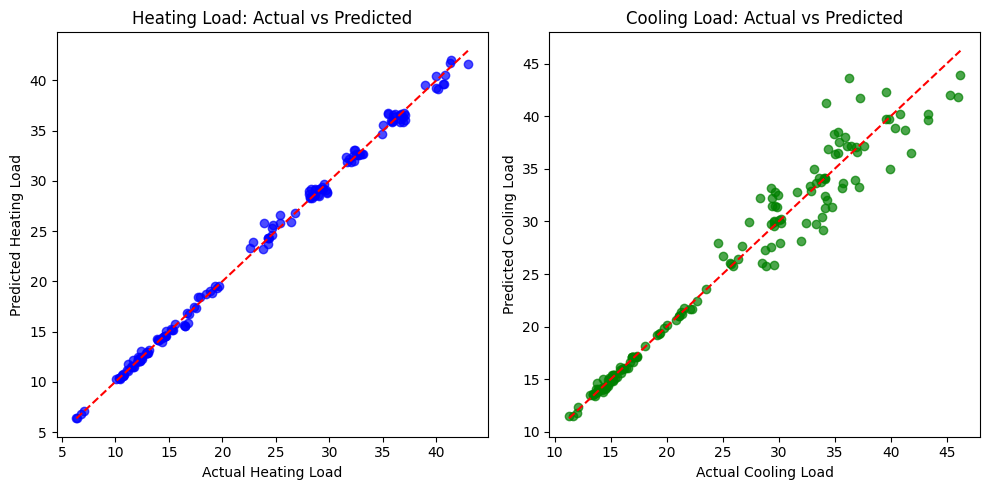

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['Y1'], y_pred_rf[:, 0], alpha=0.7, color='blue')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], 'r--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Heating Load: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test['Y2'], y_pred_rf[:, 1], alpha=0.7, color='green')
plt.plot([min(y_test['Y2']), max(y_test['Y2'])], [min(y_test['Y2']), max(y_test['Y2'])], 'r--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Cooling Load: Actual vs Predicted')

plt.tight_layout()
plt.show()
